# Magic Variables

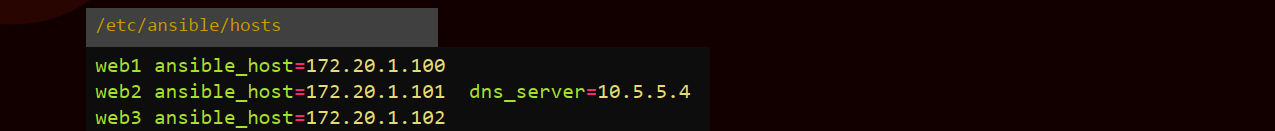

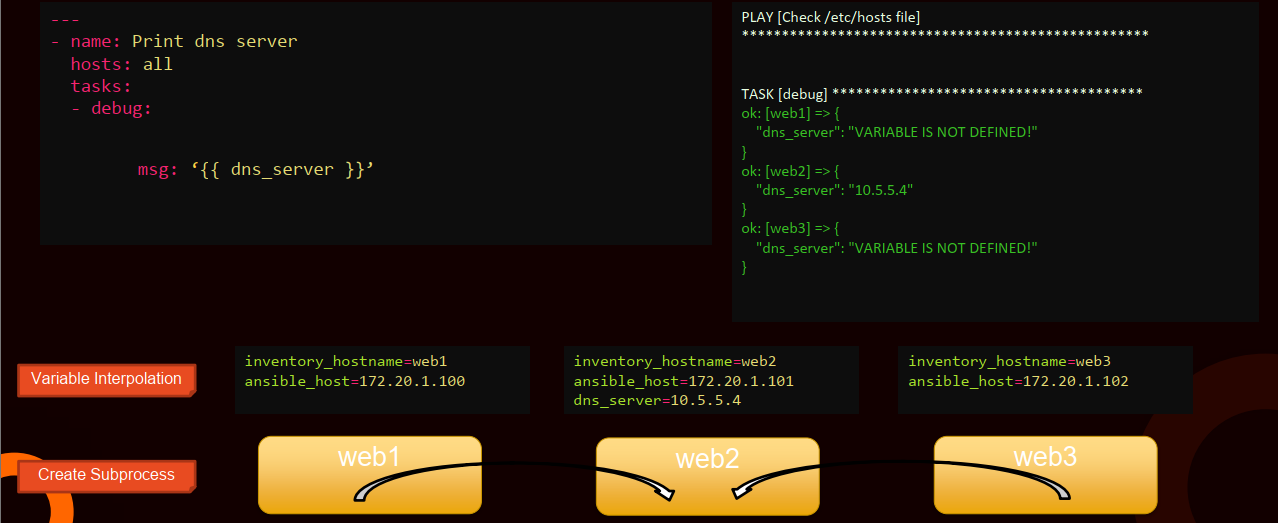

We learned that the **host variables** are associated with each host.

With this inventory file, we have a `dns_server` specified for the host `web2`.

When the Ansible playbook starts, it first creates **three sub-processes** for each host.
* Before the tasks are run on each host, Ansible goes through a **variable interpolation** stage where it picks up variables from different sources and associates them with the respective hosts.
* Each variable is only associated with the host on which it was defined, so it is unavailable on the others.
* The `dns_server` IP address is unavailable on `web1` and `web3`.

***But how do you get it if you really want it?***

***How can one Ansible subprocess running tasks for one host get the variables defined on another host?***

***How can `web1` and `web3` get the DNS server's IP address, which is specified on `web2`?***

That's where we use magic variables.

A **magic variable** called `hostvars` can be used to get variables defined on another host.
* In this case, the `hostvars['web2'].dns_server` will get you the `dns_server` defined on the `web2` node, and this will work for all hosts.
* You can get any information about the other hosts this way.

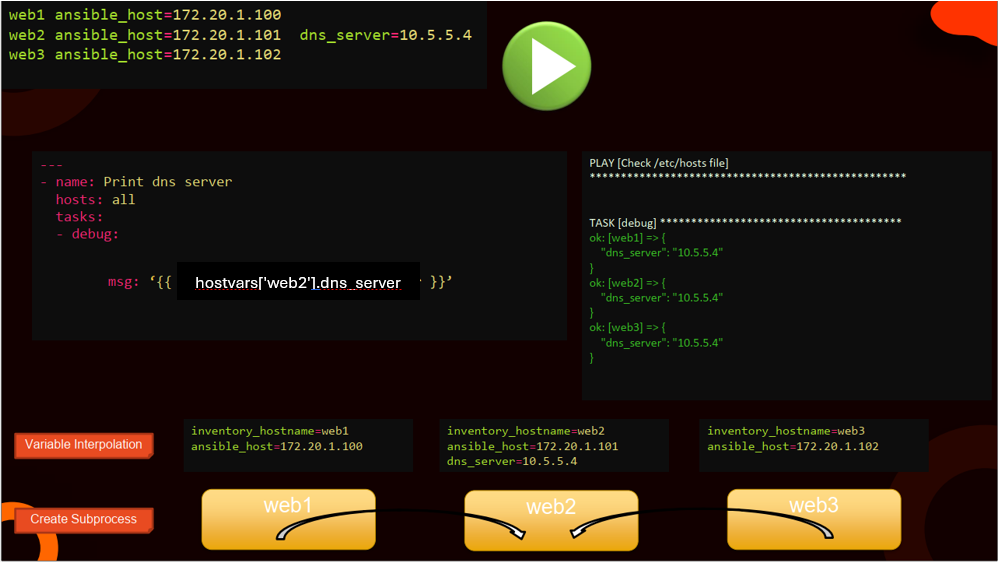

# Magic Variables - `hostvars`

**To get the hostname or IP of the other host, use the ansible_host parameter.**
* If facts are gathered, you can access **additional facts** about other hosts, such as their **architecture**, information regarding their **devices**, **mounts**, **processors**, etc.
* Anything within the **facts of a host** can be retrieved like this.

```yaml
- name: Print DNS server
  hosts: all
  tasks:
    - debug:
        msg: ‘{{ hostvars['web2']. dns_server }}’
        msg: ‘{{ hostvars['web2'].ansible_host }}’
        msg: ‘{{ hostvars['web2'].ansible_facts.architecture }}’
        msg: ‘{{ hostvars['web2'].ansible_facts.devices }}’
        msg: ‘{{ hostvars['web2'].ansible_facts.mounts }}’
        msg: ‘{{ hostvars['web2'].ansible_facts.processor }}’
```

**Also, note that you can write the same expression like this using brackets and single quotes.**
* Both these expressions yield the same results.
* You might see this in different formats in the documentation.

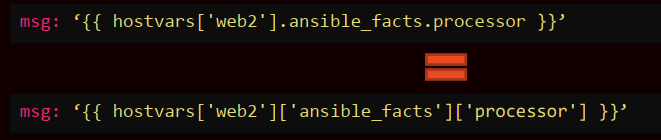

So that was one kind of magic variable that are used to get variables from other hosts.

# Magic Variables - `groups` & `group_name`

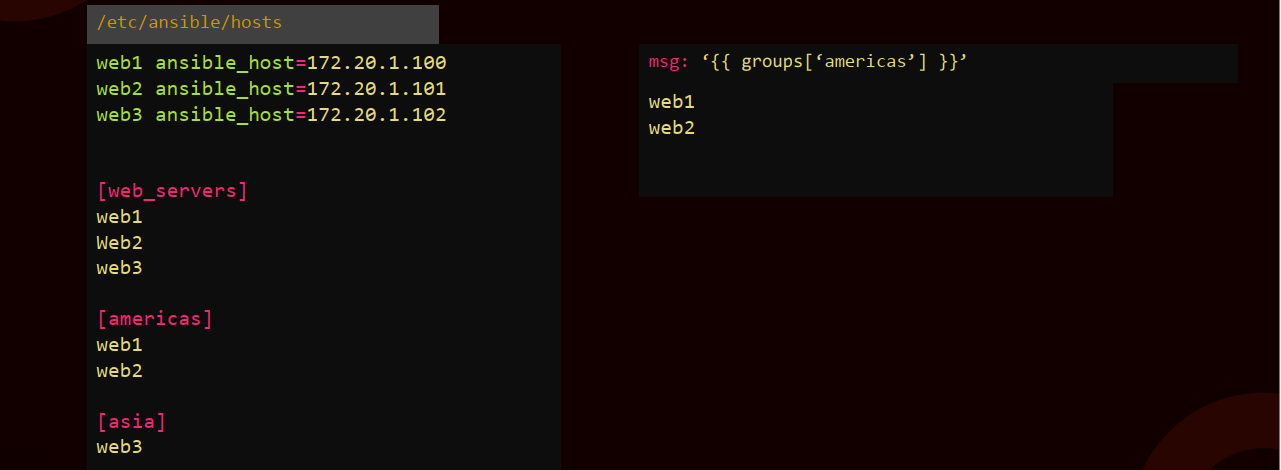

* The `groups` is another magic variable.
* `groups` return all hosts under a given group.

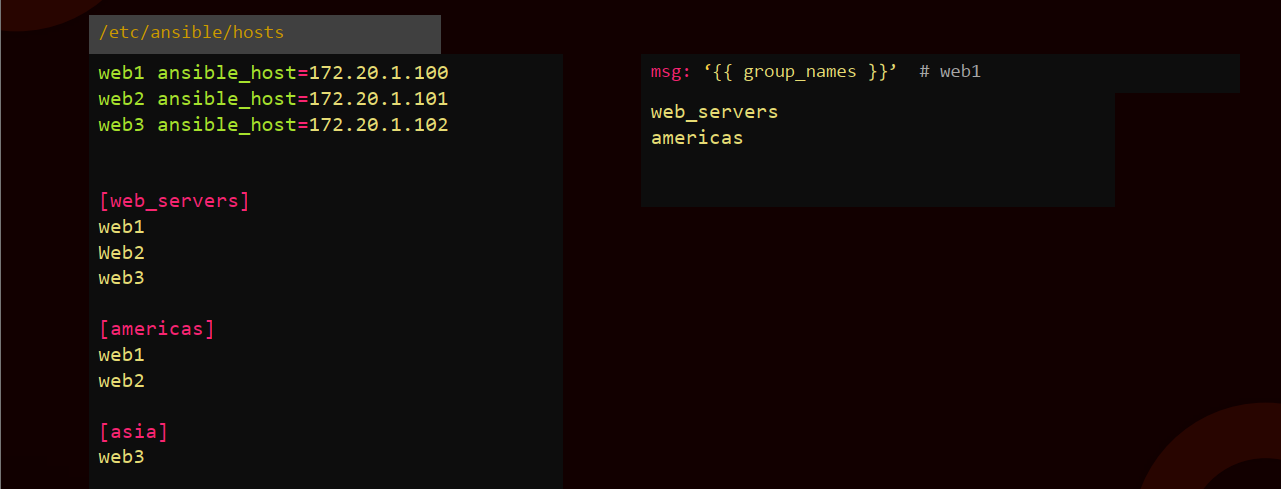

* `group_names` are the other way around.
* It returns all the groups the current host is part of.
* In this case, when you use group names in a play for host `web1`, it returns `web_servers` and `Americas`, which happen to be the groups that this particular host is part of.


# Magic Variables - `inventory_hostname`

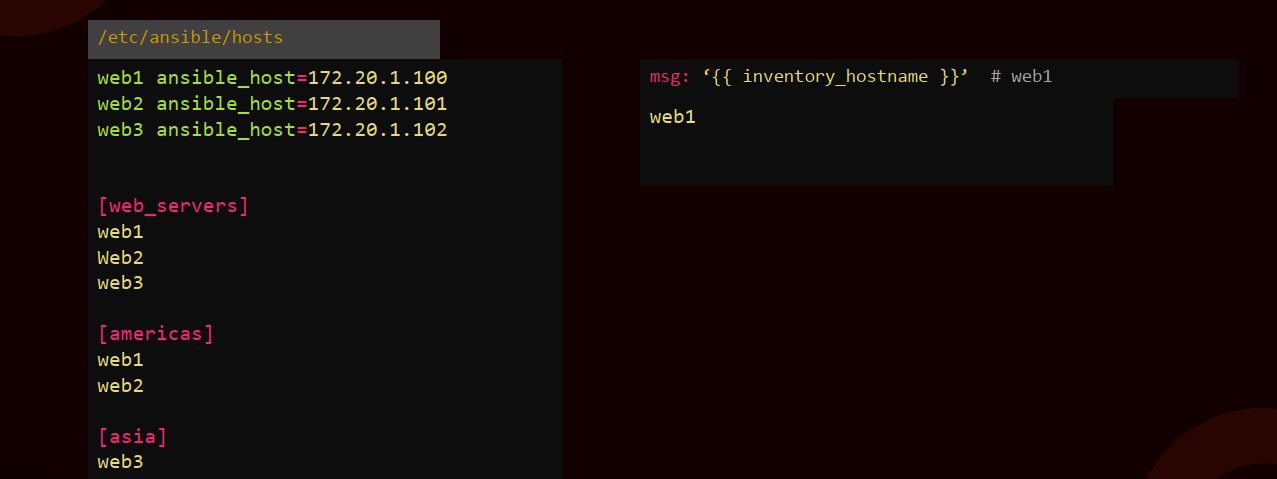

The `inventory_hostname` is a magic variable that gives you the name configured for the host in the inventory file and not the host name or `SQDN`.

Well, those are a few, and there are others as well that we can see on the documentation page.

# Magic Variable Documentation

In the documentation section, magic variables are documented under the **Using Variables** section under the **Working with Playbook** section in the user guide.

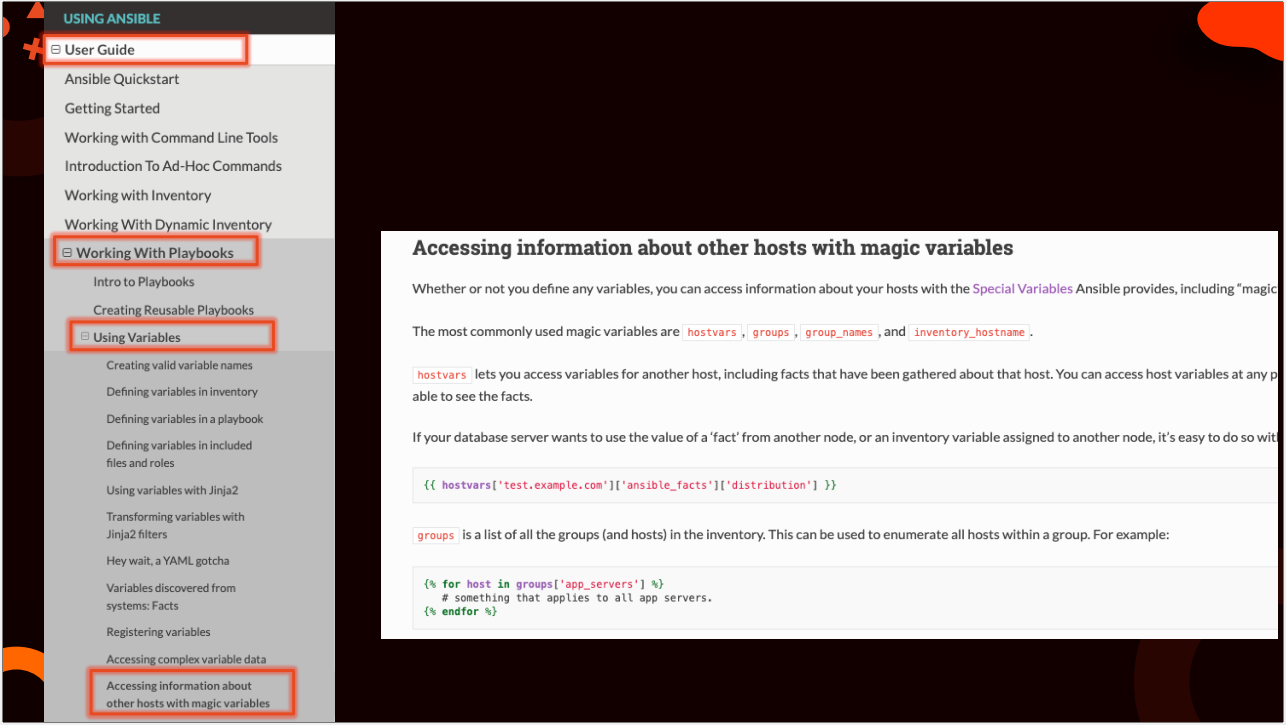